In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problems with comparing Graham matrices

Consider two distributions, a~N(mean_a, cov_a) and b~N(mean_b, cov_b), in R^3:

In [2]:
mean_a = np.array([[0.0,-0.5,0.5]])
corr_a = np.array([[1.,-.5,0.],[-.5,1.,0.],[0.,0.,1.]])
sigma_a = np.array([[1., 1., 1.]])
cov_a = corr_a * (sigma_a.T*sigma_a)

graham_a = mean_a.T*mean_a + corr_a * (sigma_a.T*sigma_a)

graham_a

array([[ 1.  , -0.5 ,  0.  ],
       [-0.5 ,  1.25, -0.25],
       [ 0.  , -0.25,  1.25]])

In [3]:
mean_b = np.array([[1.,-.5,0.]])
corr_b = np.array([[1.,0.,-.5],[0.,1.,-0.2236068],[-.5,-0.2236068,1.]])
sigma_b = np.array([[0, 1., 1.118034]])
cov_b = corr_b * (sigma_b.T*sigma_b)


graham_b = mean_b.T*mean_b + corr_b * (sigma_b.T*sigma_b)

graham_b

array([[ 1.        , -0.5       ,  0.        ],
       [-0.5       ,  1.25      , -0.25000001],
       [ 0.        , -0.25000001,  1.25000003]])

These distributions have identical graham matrices (to a certain precision):

In [4]:
def gatys_loss(m1, cov1, m2, cov2):
  g1 = m1.T*m1 + cov1
  g2 = m2.T*m2 + cov2
  return np.sum((g1-g2)**2)

gatys_loss(mean_a, cov_a, mean_b, cov_b)

6.834502805985236e-16

Yet, if we plot them in RGB-space, they are certainly different:

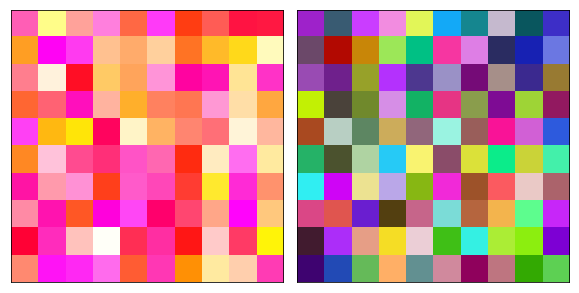

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

axes[1].imshow(np.random.multivariate_normal(mean_a[0], cov_a, (10,10)))
axes[0].imshow(np.random.multivariate_normal(mean_b[0], cov_b, (10,10)))


Similarly, consider two distributions: c~N(mean_c, cov_c) and d~N(mean_d, cov_d), in R^3:

In [6]:
mean_c = np.array([[1.,1.,1.]])
cov_c = np.zeros((3,3))

mean_d = np.array([[0.,0.,0.]])
cov_d = np.ones((3,3))

gatys_loss(mean_c, cov_c, mean_d, cov_d)

0.0

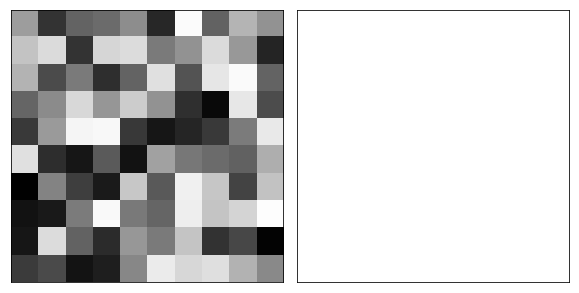

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

axes[1].imshow(np.random.multivariate_normal(mean_c[0], cov_c, (10,10)))
axes[0].imshow(np.random.multivariate_normal(mean_d[0], cov_d, (10,10)))


### The frobenius norm of the difference between Graham matrices is not a valid metric. 

# Issues with hungarian algorithm/full Earth Movers' Distance

Requires pixel-to-pixel comparisons, computation explodes in size.
Consider two 224x224x3 images fed into VGG19:

In [8]:
relu1_1_pixels = 224*224
relu1_1_features = 64

distance_matrix_size = relu1_1_features*((relu1_1_pixels)**2)*(32/8)/(10**9)
tflops_per_evaulation = (relu1_1_pixels)**3/(10**12)

print("Distance matrix size in gb for float32 at relu1_1:","{:4.1f}".format(distance_matrix_size))
print("Once have dist matrix, TFLOPS to calc EMD at relu1_1:","{:4.1f}".format(tflops_per_evaulation))

Distance matrix size in gb for float32 at relu1_1: 644.5
Once have dist matrix, TFLOPS to calc EMD at relu1_1: 126.3
